In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

from data_utils import visualize_dataset

Error in loading augmentation, can't import imgaug. Please make sure it is installed.


In [2]:
DATA_DIR = "data"
IMAGE_TEST_DIR = "images_prepped_test"
IMAGE_TRAIN_DIR = "images_prepped_train"
ANNO_TEST_DIR = "annotations_prepped_test"
ANNO_TRAIN_DIR = "annotations_prepped_train"


In [3]:
IMAGE_TRAIN_PATH = os.path.join(DATA_DIR, IMAGE_TRAIN_DIR)
image_train_filelist = [os.path.join(IMAGE_TRAIN_PATH, filename) for filename in os.listdir(IMAGE_TRAIN_PATH)]
ANNO_TRAIN_PATH = os.path.join(DATA_DIR, ANNO_TRAIN_DIR)
anno_train_filelist = [os.path.join(ANNO_TRAIN_PATH, filename) for filename in os.listdir(ANNO_TRAIN_PATH)]

In [4]:
# img = cv2.imread(im_fn)
seg = cv2.imread(anno_train_filelist[0])

seg[:,:,0]

array([[ 1,  1,  1, ..., 11, 11, 11],
       [ 1,  1,  1, ..., 11, 11, 11],
       [ 1,  1,  1, ..., 11, 11, 11],
       ...,
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  3,  3, ...,  3,  3,  3]], dtype=uint8)

In [5]:
seg[:,:,0] == seg[:,:,1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

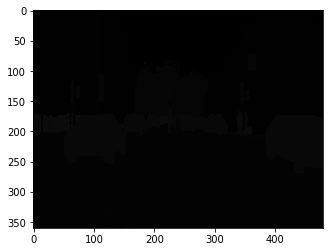

In [10]:
plt.imshow(seg, interpolation='nearest')
plt.show()

In [6]:
from data_utils.data_loader import \
    get_pairs_from_paths, DATA_LOADER_SEED, class_colors, DataLoaderError

In [7]:
def _get_colored_segmentation_image( seg, colors, n_classes, do_augment=False):
    """ Return a colored segmented image """
    seg_img = np.zeros_like(seg)

    for c in range(n_classes):
        seg_img[:, :, 0] += ((seg[:, :, 0] == c) *
                            (colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg[:, :, 0] == c) *
                            (colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg[:, :, 0] == c) *
                            (colors[c][2])).astype('uint8')

    return seg_img

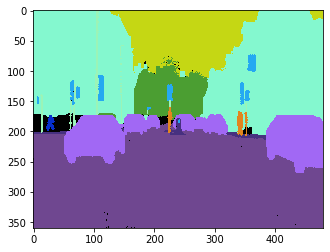

In [8]:
seg = cv2.imread(anno_train_filelist[2])
new_seg = _get_colored_segmentation_image(seg, class_colors, 11)
plt.imshow(new_seg, interpolation='nearest')
plt.show()

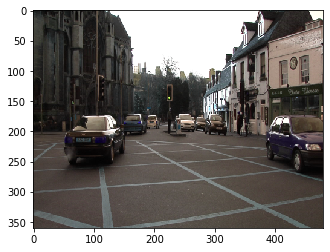

In [9]:
img = cv2.imread(image_train_filelist[2])
plt.imshow(img, interpolation='nearest')
plt.show()